**_Section.1_**

       continent  avg_suicide_rate  avg_pci
0         Africa          6.799830   2414.0
1           Asia          6.823095   8956.0
2         Europe         10.719748  37558.0
3  North America          6.186534  58460.0
4  South America          8.411172  11259.0


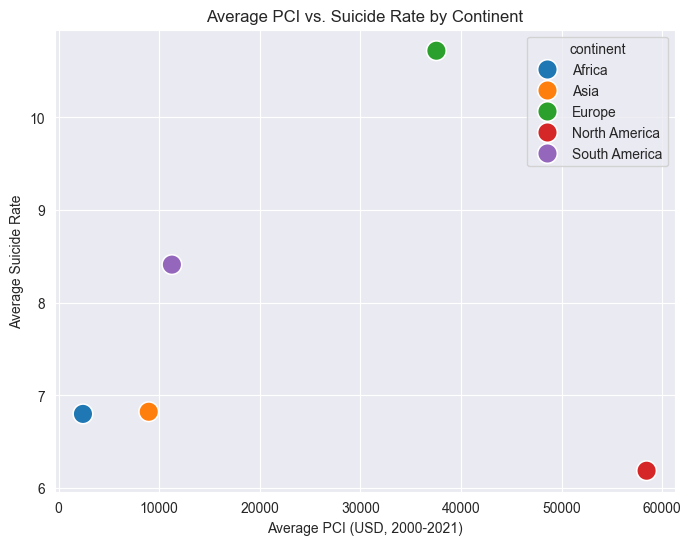

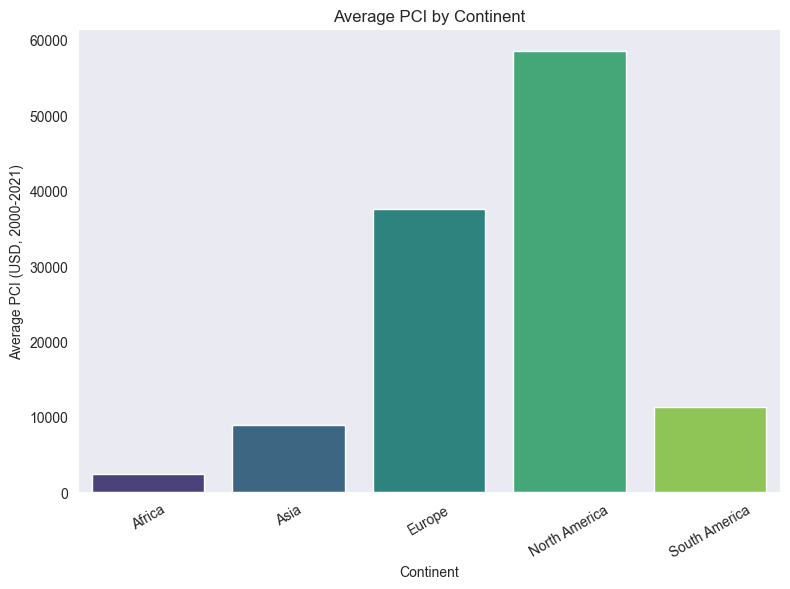

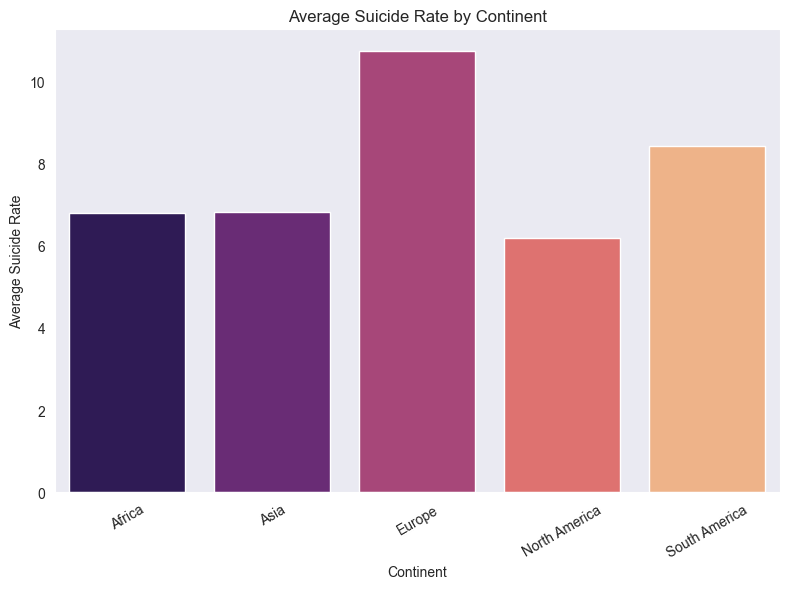

Pearson correlation between PCI and suicide rate: 0.07


In [28]:
#Analysis 1:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# loading files.
df_suicide = pd.read_csv('../data/world_suicide_rates.csv')
df_continent = pd.read_csv('../data/country_and_continent.csv')
df_pci = pd.read_csv('../data/continent_specific_pci_avg.csv')

# standardized dataframes.
for df in [df_suicide, df_continent, df_pci]:
    df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

# merging
merged_df = pd.merge(df_suicide, df_continent, on='country_name', how='left')

# keeping only the selected continents
continents_needed = ['Australia', 'North America', 'Europe', 'South America', 'Asia', 'Africa']
merged_df = merged_df[merged_df['continent'].isin(continents_needed)]

#calculating average suicide rate by continent
avg_suicide_by_continent = merged_df.groupby('continent')['suicide_rate'].mean().reset_index()
avg_suicide_by_continent.rename(columns={'suicide_rate': 'avg_suicide_rate'}, inplace=True)

# merging in PCI averages
summary_df = pd.merge(avg_suicide_by_continent, df_pci, on='continent')
summary_df.rename(columns={'average_pci_2_decades': 'avg_pci'}, inplace=True)

# clean PCI (convert to float, remove commas)
summary_df['avg_pci'] = summary_df['avg_pci'].replace(',', '', regex=True).astype(float)

print(summary_df)  # Show summary table

# scatter plot: PCI vs Suicide Rate
plt.figure(figsize=(8,6))
sns.scatterplot(data=summary_df, x='avg_pci', y='avg_suicide_rate', hue='continent', s=200)
plt.title('Average PCI vs. Suicide Rate by Continent')
plt.xlabel('Average PCI (USD, 2000-2021)')
plt.ylabel('Average Suicide Rate')
plt.grid(True)
plt.savefig('../visuals/charts/avg_pci_vs_suicide_rate_1.png', dpi=300, bbox_inches='tight')
plt.show()

# Bar chart: PCI by continent
plt.figure(figsize=(8,6))
sns.barplot(x='continent', y='avg_pci', data=summary_df, hue='continent', palette='viridis', legend=False)
plt.title('Average PCI by Continent')
plt.xlabel('Continent')
plt.ylabel('Average PCI (USD, 2000-2021)')
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('../visuals/charts/avg_pci_by_continent_barchart_2.png', dpi=300)
plt.show()

# Bar chart: Suicide rate by continent
plt.figure(figsize=(8,6))
sns.barplot(x='continent', y='avg_suicide_rate', data=summary_df, hue='continent', palette='magma', legend=False)
plt.title('Average Suicide Rate by Continent')
plt.xlabel('Continent')
plt.ylabel('Average Suicide Rate')
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('../visuals/charts/avg_suicide_rate_by_continent_barchart_3.png', dpi=300)
plt.show()

# Correlation calculation
cor = summary_df['avg_pci'].corr(summary_df['avg_suicide_rate'])
print(f"Pearson correlation between PCI and suicide rate: {cor:.2f}")


**_Statistical Analysis Explanation(Section.1)_**

After aggregating and visualizing average per capita income (PCI) and average suicide rate for each continent, the calculated Pearson correlation coefficient was 0.07.

Interpretation:

A coefficient close to 0, such as 0.07, indicates almost no linear relationship between PCI and suicide rate across continents in this dataset.

In other words, as average income increases or decreases, suicide rates do not show a consistent pattern of increasing or decreasing with it at the continental level.

This finding is visually supported by your scatter plot, where the points do not form a clear upward or downward trend.

Insights:

Economic prosperity alone does not explain differences in suicide rates between continents.

Factors such as culture, healthcare infrastructure, social support, and mental health awareness likely have a much stronger impact.

This result emphasizes the need for holistic approaches in policy and research—addressing social, psychological, and cultural determinants in addition to economic variables.

Recommendation:

For more nuanced insights, further analyses could focus on exploring correlations within continents, individual countries, or over time, rather than aggregated continental averages.

**_Section.2:_**

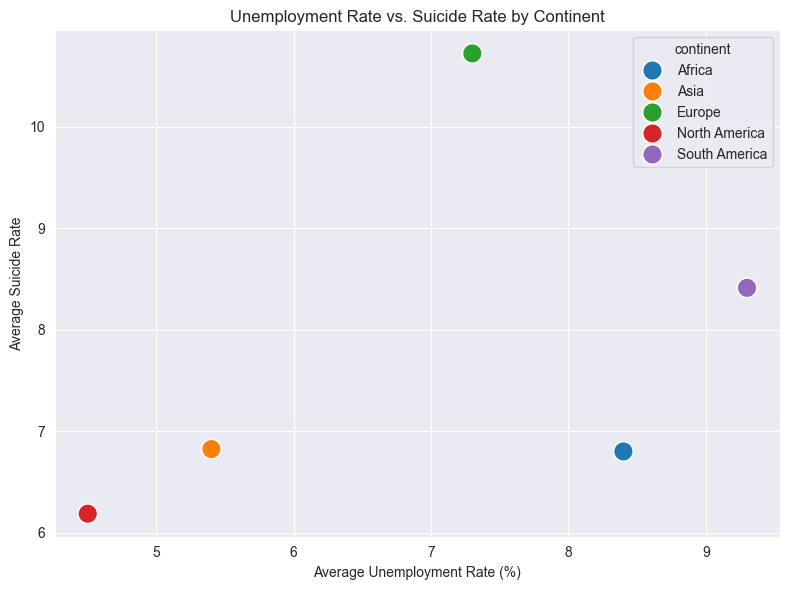

Pearson correlation between unemployment and suicide rate: 0.44


In [38]:
# Analysis.2:

# Loading unemployment rates
df_unemployed = pd.read_csv('../data/continent_specific_unemployement_rate.csv')

summary_df.columns = [col.strip().lower().replace(' ', '_') for col in summary_df.columns]

summary_df = summary_df.drop(columns=['unemployment_rate_x', 'unemployment_rate_y'], errors='ignore')

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='unemployment_rate',
    y='avg_suicide_rate',
    data=summary_df,
    hue='continent', s=200
)
plt.title('Unemployment Rate vs. Suicide Rate by Continent')
plt.xlabel('Average Unemployment Rate (%)')
plt.ylabel('Average Suicide Rate')
plt.grid(True)
plt.tight_layout()
plt.savefig('../visuals/charts/unemployment_vs_suicide_rate_4.png', dpi=300)
plt.show()

# --- Correlation calculation between unemployment and suicide rate ---
cor = summary_df['unemployment_rate'].corr(summary_df['avg_suicide_rate'])
print(f"Pearson correlation between unemployment and suicide rate: {cor:.2f}")


**_Analysis of Unemployment and Suicide Rate by Continent(Section.2)_**

After aggregating continent-level average unemployment rates and suicide rates, the Pearson correlation coefficient was 0.44.

Interpretation:

A coefficient of 0.44 shows a moderate positive linear relationship between unemployment and suicide rates across continents.

This means that, on average, continents with higher unemployment rates tend to also have higher suicide rates.

However, the relationship isn't very strong (not close to 1), indicating that while unemployment is likely a contributing factor, other societal influences are also at play.

Implications:

This result suggests that economic conditions and joblessness have a measurable impact on suicide rates at the continental scale.

Policymakers should consider unemployment interventions and job creation programs as part of comprehensive suicide prevention strategies.

The correlation highlights the need to further investigate country-level or year-by-year trends, as continent-wide averages may obscure more local effects.

Next Steps:

Perform similar analyses at the country level for finer resolution.

Consider including other factors such as mental health service coverage, education, and GDP in multi-factor regression to better predict suicide rate trends.